# **Análise Estatística: Regressão Logística**

O naufrágio do Titanic é um dos naufrágios mais infames da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado “inafundável” RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1.502 dos 2.224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Neste desafio, pedimos que você construa um modelo de regressão logística que preveja a sobrevivência (1 se o passageiro sobreviveu ou 0 caso contrário), baseado em algumas características tais como classe de serviço, sexo, idade, etc. A base de dados de teste tem a mesma estrutura da base de treinamento, mas a variável Survived não contém nenhum valor (ou não está presente).

Depois de construir seu modelo, você vai aplicá-lo a este conjunto de dados de teste e prever o valor da variável Survived.

Como se pode ver, utilizaremos tanto variáveis categóricas como contínuas.

Quando trabalhamos com uma base de dados real, precisamos levar em conta o fato de podermos ter dados faltantes ou corrompidos, e, portanto, precisamos preparar a base de dados para nossa análise.

### **Bibliotecas utilizadas:**

In [17]:
# install.packages('Hmisc')

library(tidyverse)
library(ggplot2)
library(Hmisc)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### **Limpeza de dados:**

**Extraindo os dados e separando as colunas necessárias para o nosso trabalho:**

In [18]:
titanicTreino <- read.csv('titanic_dw_train.csv')

titanic <- titanicTreino[, c('PassengerId', 'Survived', 'Pclass', 'Sex', 
                             'Age', 'SibSp', 'Parch', 'Fare', 'Embarked')]

**Para os valores NaN de outras colunas, suas linhas serão excluidas:**

In [19]:
titanic <- na.omit(titanic)


### **Dicionário dos dados:**

In [20]:
dic_dados <- data.frame(nome_da_variavel = c('PassengerId','Survived', 'Pclass', 'Sex',
                                             'Age', 'SibSp' , 'Parch', 'Fare', 'Embarked'),
                        descricao_variavel = c('ID do passageiro', 'Sobrevivência',
                                               'Tipo de ticket', 'Sexo do passageiro',
                                               'Idade do passageiro','Nº de irmãos/cônjuges a bordo',
                                               'Nº de pais/filhos a bordo', 'Tarifa de passageiro',
                                               'Porto de embarcação'),
                        tipo_variavel = c('Numérica', 'Categórica', 'Numérica', 'Categórica', 
                                          'Numérica', 'Numérica', 'Numérica', 'Numérica',
                                          'Categórica'),
                        tipo_mensuracao_variavel = c('Nominal', 'Ordinal', 'Ordinal', 'Nominal', 
                                                     'Razão', 'Razão', 'Razão', 'Razão', 
                                                     'Ordinal'),
                        valores_possiveis = c('Valores de 2 à 1304', '0 = Não, 1 = Sim',
                                              '1 = 1º classe, 2 = 2º classe, 3 = 3º classe',
                                              'Male (masculino), female (feminino)',
                                              'Números inteiros positivos', 'Valores de 0 à 8',
                                              'Valores de 0 à 9', 'Números reais positivos',
                                              'C = Cherbourg, Q = Queenstown, S = Southampton'))
View(dic_dados)

nome_da_variavel,descricao_variavel,tipo_variavel,tipo_mensuracao_variavel,valores_possiveis
<chr>,<chr>,<chr>,<chr>,<chr>
PassengerId,ID do passageiro,Numérica,Nominal,Valores de 2 à 1304
Survived,Sobrevivência,Categórica,Ordinal,"0 = Não, 1 = Sim"
Pclass,Tipo de ticket,Numérica,Ordinal,"1 = 1º classe, 2 = 2º classe, 3 = 3º classe"
Sex,Sexo do passageiro,Categórica,Nominal,"Male (masculino), female (feminino)"
Age,Idade do passageiro,Numérica,Razão,Números inteiros positivos
SibSp,Nº de irmãos/cônjuges a bordo,Numérica,Razão,Valores de 0 à 8
Parch,Nº de pais/filhos a bordo,Numérica,Razão,Valores de 0 à 9
Fare,Tarifa de passageiro,Numérica,Razão,Números reais positivos
Embarked,Porto de embarcação,Categórica,Ordinal,"C = Cherbourg, Q = Queenstown, S = Southampton"


### **Análise Exploratória**

In [21]:
str(titanic)

'data.frame':	717 obs. of  9 variables:
 $ PassengerId: int  2 3 4 6 10 11 12 13 15 17 ...
 $ Survived   : int  0 1 0 0 0 1 0 0 1 1 ...
 $ Pclass     : int  3 1 2 3 3 1 3 3 2 3 ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  29 37 36 30 21 53 20 26 62 24 ...
 $ SibSp      : int  0 1 0 0 1 1 0 0 0 0 ...
 $ Parch      : int  0 0 0 0 0 1 0 0 0 0 ...
 $ Fare       : num  7.85 90 13 8.05 6.5 ...
 $ Embarked   : chr  "S" "Q" "S" "S" ...
 - attr(*, "na.action")= 'omit' Named int [1:174] 4 14 24 25 27 38 39 43 47 52 ...
  ..- attr(*, "names")= chr [1:174] "4" "14" "24" "25" ...


In [22]:
head(titanic, 10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,2,0,3,male,29,0,0,7.8542,S
2,3,1,1,female,37,1,0,90.0000,Q
3,4,0,2,male,36,0,0,13.0000,S
5,6,0,3,male,30,0,0,8.0500,S
6,10,0,3,male,21,1,0,6.4958,S
7,11,1,1,male,53,1,1,81.8583,S
8,12,0,3,male,20,0,0,7.9250,S
9,13,0,3,male,26,0,0,7.8958,S
10,15,1,2,male,62,0,0,10.5000,S


In [23]:
tail(titanic, 10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
880,1288,1,1,female,42,0,0,227.5250,C
881,1289,0,2,male,18,0,0,11.5000,S
882,1290,0,3,male,20,0,0,9.8458,S
883,1293,0,1,male,50,1,0,106.4250,C
884,1294,0,3,female,18,0,1,14.4542,C
887,1297,1,1,male,36,0,0,26.3875,S
888,1298,0,2,male,22,2,0,31.5000,S
889,1299,1,2,female,24,0,0,13.0000,S
890,1303,0,3,male,31,0,0,7.7750,S


In [24]:
dim(titanic)

[1] 717   9

In [26]:
summary(titanic)

  PassengerId        Survived          Pclass          Sex           
 Min.   :   2.0   Min.   :0.0000   Min.   :1.000   Length:717        
 1st Qu.: 335.0   1st Qu.:0.0000   1st Qu.:1.000   Class :character  
 Median : 672.0   Median :0.0000   Median :2.000   Mode  :character  
 Mean   : 658.1   Mean   :0.4031   Mean   :2.202                     
 3rd Qu.: 980.0   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1304.0   Max.   :1.0000   Max.   :3.000                     
      Age              SibSp           Parch            Fare       
 Min.   : 0.1667   Min.   :0.000   Min.   :0.000   Min.   :  0.00  
 1st Qu.:21.0000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:  8.05  
 Median :28.0000   Median :0.000   Median :0.000   Median : 16.00  
 Mean   :29.9064   Mean   :0.523   Mean   :0.463   Mean   : 36.90  
 3rd Qu.:39.0000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.: 34.38  
 Max.   :80.0000   Max.   :8.000   Max.   :6.000   Max.   :512.33  
   Embarked        
 Length:717   

In [27]:
sapply(titanic[, c('Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked')], table)

$Survived

  0   1 
428 289 

$Pclass

  1   2   3 
194 184 339 

$Sex

female   male 
   262    455 

$SibSp

  0   1   2   3   4   5   8 
461 199  25  10  17   4   1 

$Parch

  0   1   2   3   4   5   6 
518 107  73   7   4   6   2 

$Embarked

  C   Q   S 
148  33 536 


In [28]:
describe(titanic)

titanic 

 9  Variables      717  Observations
--------------------------------------------------------------------------------
PassengerId 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     717        0      717        1    658.1    435.4     66.6    130.6 
     .25      .50      .75      .90      .95 
   335.0    672.0    980.0   1170.4   1241.2 

lowest :    2    3    4    6   10, highest: 1297 1298 1299 1303 1304
--------------------------------------------------------------------------------
Survived 
       n  missing distinct     Info      Sum     Mean      Gmd 
     717        0        2    0.722      289   0.4031   0.4819 

--------------------------------------------------------------------------------
Pclass 
       n  missing distinct     Info     Mean      Gmd 
     717        0        3    0.858    2.202   0.8945 
                            
Value          1     2     3
Frequency    194   184   339
Proportion 0.271 0.257 0.473
----------------

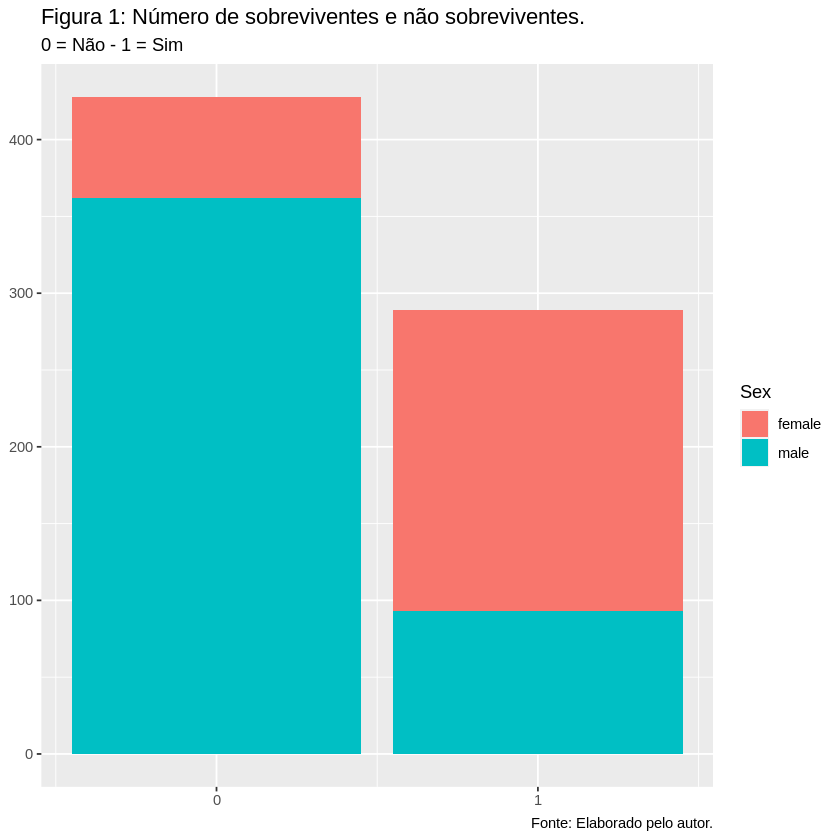

In [29]:
ggplot(titanic) +
  geom_bar(aes(Survived, fill = Sex)) +
  scale_x_continuous(breaks = seq(0,1,1)) +
  labs(title = 'Figura 1: Número de sobreviventes e não sobreviventes.', subtitle = '0 = Não - 1 = Sim', x = NULL, y = NULL, caption = 'Fonte: Elaborado pelo autor.')

*O gráfico da figura 1, apresenta um grande número de vítimas fatais, chegando a quase 300 pessoas. Entre as vítimas fatais, em sua grande maioria sendo do sexo masculino.*

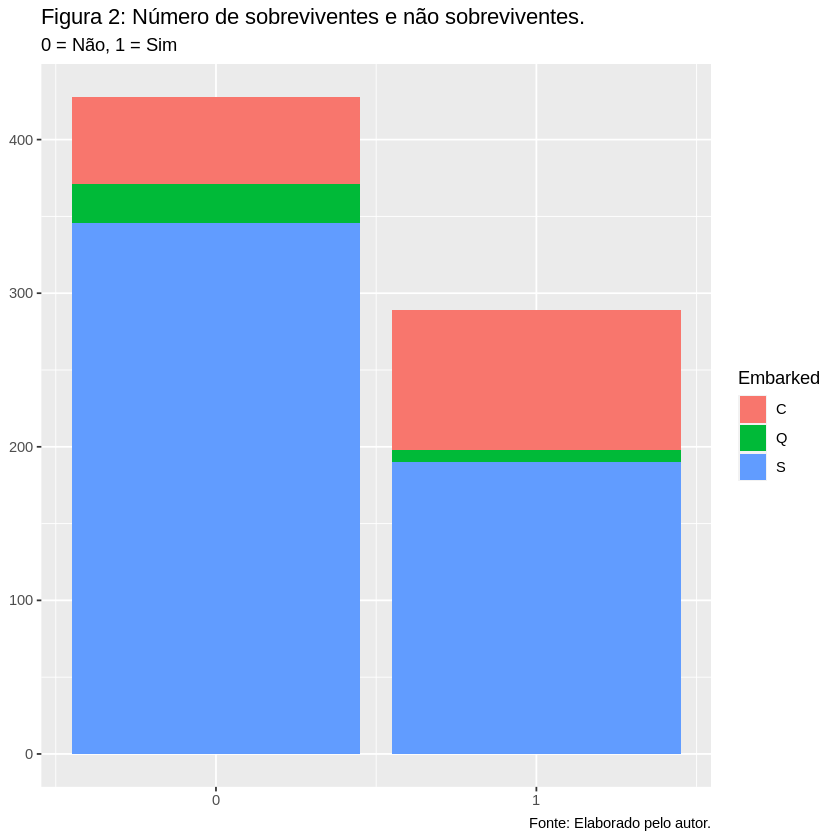

In [30]:
ggplot(titanic) +
  geom_bar(aes(Survived, fill = Embarked)) +
  scale_x_continuous(breaks = seq(0,1,1)) +
  labs(title = 'Figura 2: Número de sobreviventes e não sobreviventes.', subtitle = '0 = Não, 1 = Sim', x = NULL, y = NULL, col = 'Embarque', caption = 'Fonte: Elaborado pelo autor.')

*Mais da metade dos passageiros eram provenientes de Southampton, sendo o maior números de vítimas, segundo a figura 2.*

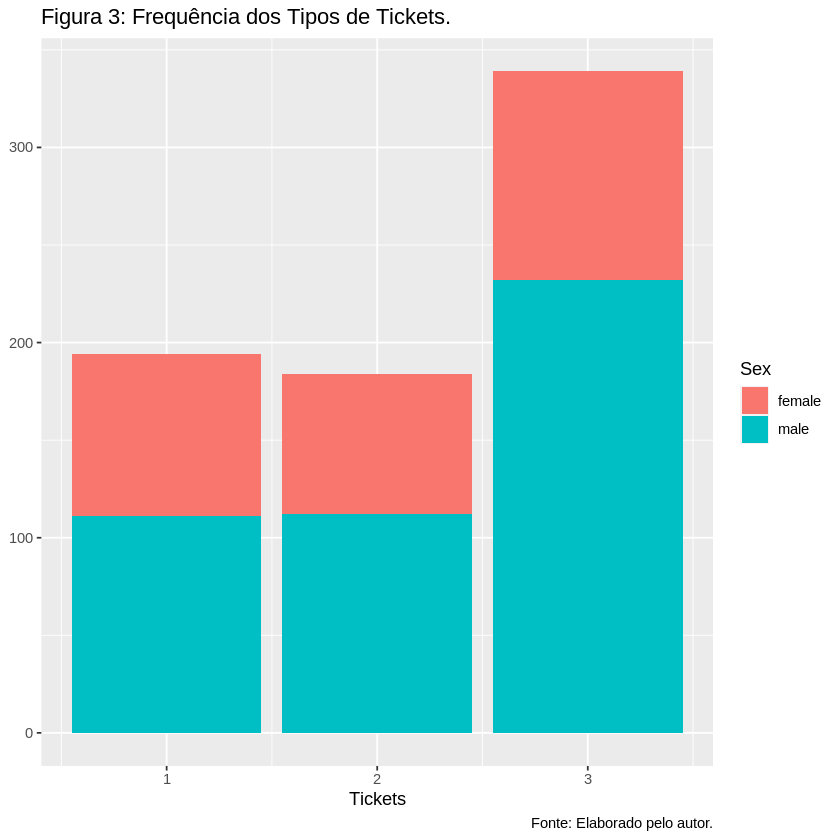

In [31]:
ggplot(titanic) +
  geom_bar(aes(Pclass, fill = Sex)) +
  labs(title = 'Figura 3: Frequência dos Tipos de Tickets.', x = 'Tickets', y = NULL, caption = 'Fonte: Elaborado pelo autor.')

Dos passageiros presentes no Titanic, quase 400 pessoas possuiam tickets da 3º classe e quase 200 pessoas pertenciam à 1º classe.

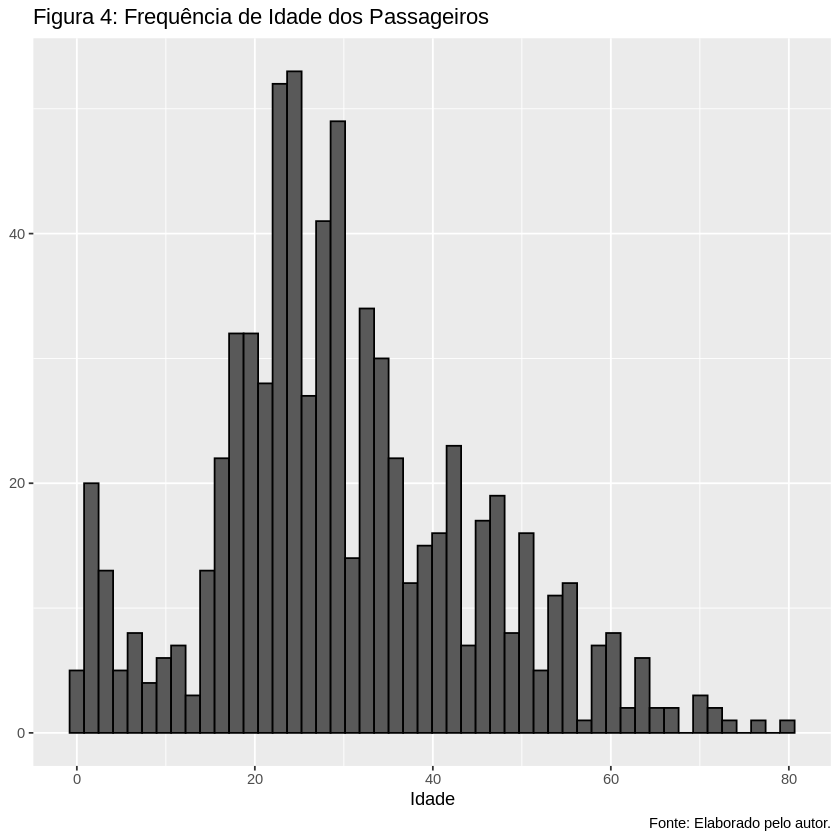

In [32]:
ggplot(titanic) +
  geom_histogram(aes(Age), bins = 50, color = 'black') +
  labs(title = 'Figura 4: Frequência de Idade dos Passageiros', x = 'Idade', y = NULL, caption = 'Fonte: Elaborado pelo autor.')

*Vemos que a faixa etária mais frequente encontra-se entre 20 e 40 anos.*

### **Ajustando um modelo de regressão logística**

**Modelo sem nenhuma variável preditora:**

In [35]:
modelo1 <- glm(Survived ~ 1, data = titanic, family = binomial())
summary(modelo1)


Call:
glm(formula = Survived ~ 1, family = binomial(), data = titanic)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.016  -1.016  -1.016   1.348   1.348  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.39270    0.07614  -5.158  2.5e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 966.85  on 716  degrees of freedom
Residual deviance: 966.85  on 716  degrees of freedom
AIC: 968.85

Number of Fisher Scoring iterations: 4


**Cálculos manuais:**

In [36]:
p <- as.numeric(addmargins(table(titanic$Survived))[2] / addmargins(table(titanic$Survived))[3])
print(p)

# As chances
chance <- p / (1 - p)
print(as.numeric(chance))

log(as.numeric(chance))

[1] 0.4030683
[1] 0.6752336


[1] -0.3926965

*Ao analisar o nosso primeiro modelo, constatamos que a probabilidade de sobrevivência ao evento é de aproximadamente 40%. As chances são de 67%, e o intercepto do modelo sem variáveis preditoras é a estimativa do logaritmo das chances de sobrevivência, que é igual a -0.392696.*

**Modelo com uma variável preditora binária:**

In [37]:
modelo2 <- glm(Survived ~ Sex, data = titanic, family = binomial())
summary(modelo2)


Call:
glm(formula = Survived ~ Sex, family = binomial(), data = titanic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6605  -0.6762  -0.6762   0.7619   1.7820  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0885     0.1423   7.648 2.04e-14 ***
Sexmale      -2.4475     0.1838 -13.319  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 966.85  on 716  degrees of freedom
Residual deviance: 756.61  on 715  degrees of freedom
AIC: 760.61

Number of Fisher Scoring iterations: 4


**Cálculos manuais:**

In [38]:
addmargins(table(titanic$Survived, titanic$Sex))

,female,male,Sum
0,66,362,428
1,196,93,289
Sum,262,455,717


In [39]:
# Chances para mulheres
chanceFem <- (196 / 262) / (66 / 262)
print(chanceFem)

# Chances para homens
chanceMas <- (93 / 455) / (362 / 455)
print(chanceMas)

# Chances do homem e as chances da mulher:
chanceMasFem <- (93 / 362) / (196 / 66)
print(chanceMasFem)

# Intercept
log(chanceFem)

# Coeficiente para homens
log(chanceMasFem)

[1] 2.969697
[1] 0.2569061
[1] 0.08650919


[1] 1.08846

[1] -2.447505

*Ao analisar o modelo e confirmar através dos cálculos manuais, chegamos às seguintes conclusões:*

* *As chances de sobrevivência para uma mulher são de 2.969697.*

* *Já as chances de sobrevivência para um homem são de 0.2569061.*

* *A razão entre as chances do homem e as chances da mulher é de 0.08650919.*

* *O intercepto do modelo é o log das chances para mulheres, que é de 1.0884599.*

* *O coeficiente para homens é o log da razão das chances entre o grupo de mulheres e o grupo de homens, que é de -2.4475046.*

**Modelo com uma variável preditora contínua:**

In [40]:
modelo3 <- glm(Survived ~ Fare, data = titanic, family = binomial())
summary(modelo3)


Call:
glm(formula = Survived ~ Fare, family = binomial(), data = titanic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2449  -0.9189  -0.8882   1.3664   1.5408  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.822924   0.102857  -8.001 1.24e-15 ***
Fare         0.012391   0.002126   5.830 5.55e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 966.85  on 716  degrees of freedom
Residual deviance: 914.80  on 715  degrees of freedom
AIC: 918.8

Number of Fisher Scoring iterations: 4


**Cálculos manuais:**

In [41]:
# Calculando os parametros beta 0 e beta 1
beta_0 <- as.numeric(coef(modelo3)[1])
beta_1 <- as.numeric(coef(modelo3)[2])
c(beta_0, beta_1)

# Média da variável Fare
mediaFare <- mean(titanic$Fare)
mediaFare


logit_p1 <- beta_0 + beta_1 * mediaFare
logit_p2 <- beta_0 + beta_1 * (mediaFare +1)

c(logit_p1, logit_p2)


logit_p2 - logit_p1

# Calculando a probabilidade e a chance
p1 <- exp(logit_p1) / (1 + exp(logit_p1))
p1_chance <- p1 / (1 - p1)

c(p1, p1_chance)

# Calculando a probabilidade e a chance
p2 <- exp(logit_p2) / (1 + exp(logit_p2))
p2_chance <- p2 / (1 - p2)

c(p2, p2_chance)


p2_chance / p1_chance

[1] -0.82292389  0.01239127

[1] 36.89998

[1] -0.3656864 -0.3532951

[1] 0.01239127

[1] 0.4095838 0.6937203

[1] 0.4125836 0.7023699

[1] 1.012468

*No caso de uma variável preditora contínua, as probabilidades e as chances (odds) são dadas por:*

*- p1: 0.40958, p1_chance: 0.69372.*

*- p2: 0.41258, p2_chance: 0.70236.*

*- A razão entre chances: 1.01246.*

*O aumento esperado nas chances é: 0.70236.*

**Modelo com mais de uma variável preditora:**

In [42]:
modelo4 <- glm(Survived ~ Fare + Age + Parch, data = titanic, family = binomial())
summary(modelo4)


Call:
glm(formula = Survived ~ Fare + Age + Parch, family = binomial(), 
    data = titanic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4384  -0.9317  -0.8385   1.2707   1.7608  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.396888   0.190307  -2.086  0.03702 *  
Fare         0.013284   0.002310   5.751 8.85e-09 ***
Age         -0.016418   0.005699  -2.881  0.00396 ** 
Parch        0.067730   0.090537   0.748  0.45440    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 966.85  on 716  degrees of freedom
Residual deviance: 904.40  on 713  degrees of freedom
AIC: 912.4

Number of Fisher Scoring iterations: 4


**Cálculos manuais:**

In [44]:
# Média das variáveis
mediaFare <- mean(titanic$Fare)
mediaAge <- mean(titanic$Age)
mediaParch <- mean(titanic$Parch)


print('Parâmetros beta 0, 1, 2 e 3: ')
beta_0 <- as.numeric(coef(modelo4)[1])
beta_1 <- as.numeric(coef(modelo4)[2])
beta_2 <- as.numeric(coef(modelo4)[3])
beta_3 <- as.numeric(coef(modelo4)[4])

c(beta_0, beta_1, beta_2, beta_3)


exp(c(beta_0, beta_1, beta_2, beta_3))


print('Diferença entre os logit: ')
logit_p1 <- beta_0 + beta_1 * mediaFare + beta_2 * mediaAge + beta_3 * mediaParch
logit_p2 <- beta_0 + beta_1 * (mediaFare + 1) + beta_2 * mediaAge + beta_3 * mediaParch

logit_p2 - logit_p1


print('Probabilidades e chances: ')
p1 <- exp(logit_p1) / (1 + exp(logit_p1))
p1_chance <- p1 / (1 - p1)

p2 <- exp(logit_p2) / (1 + exp(logit_p2))
p2_chance <- p2 / (1 - p2)

c(p1, p1_chance, p2, p2_chance)


print('Diferença entre as chances: ')
p2_chance - p1_chance

[1] "Parâmetros beta 0, 1, 2 e 3: "


[1] -0.39688849  0.01328447 -0.01641798  0.06773005

[1] 0.6724090 1.0133731 0.9837161 1.0700764

[1] "Diferença entre os logit: "


[1] 0.01328447

[1] "Probabilidades e chances: "


[1] 0.4094273 0.6932715 0.4126432 0.7025427

[1] "Diferença entre as chances: "


[1] 0.009271189

**Comparando os modelos de Regressão Logística:**

In [45]:
modeloFull <- glm(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data = titanic, family = binomial())
summary(modeloFull)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked, family = binomial(), data = titanic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5758  -0.6892  -0.4133   0.6492   2.5591  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.020667   0.600461   8.361  < 2e-16 ***
Pclass      -1.026129   0.160425  -6.396 1.59e-10 ***
Sexmale     -2.657000   0.221198 -12.012  < 2e-16 ***
Age         -0.032588   0.007660  -4.254 2.10e-05 ***
SibSp       -0.266505   0.128245  -2.078  0.03770 *  
Parch        0.010040   0.116302   0.086  0.93120    
Fare         0.001483   0.002306   0.643  0.52012    
EmbarkedQ   -1.587587   0.542507  -2.926  0.00343 ** 
EmbarkedS   -0.627413   0.253595  -2.474  0.01336 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 966.85  on 716  degrees of freedom
Residual deviance: 651.

Ao analisar os p-values, observamos que o número de pais/filhos a bordo (Parch) e a tarifa de passageiro (Fare) podem não contribuir para o modelo. Portanto, será necessário reduzi-lo, mantendo apenas as variáveis estatisticamente significativas, a fim de realizar uma comparação adequada.

In [46]:
modeloReduzido <- glm(Survived ~ Pclass + Sex + Age + SibSp + Embarked, data = titanic, family = binomial())
summary(modeloReduzido)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Embarked, 
    family = binomial(), data = titanic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5323  -0.6886  -0.4103   0.6428   2.5640  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.213117   0.535469   9.736  < 2e-16 ***
Pclass      -1.074946   0.141109  -7.618 2.58e-14 ***
Sexmale     -2.670920   0.216266 -12.350  < 2e-16 ***
Age         -0.032775   0.007649  -4.285 1.83e-05 ***
SibSp       -0.245954   0.121167  -2.030  0.04237 *  
EmbarkedQ   -1.615786   0.540857  -2.987  0.00281 ** 
EmbarkedS   -0.661816   0.248054  -2.668  0.00763 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 966.85  on 716  degrees of freedom
Residual deviance: 651.84  on 710  degrees of freedom
AIC: 665.84

Number of Fisher Scoring iterations: 5


In [47]:
anova(modeloReduzido, modeloFull, test = 'Chisq')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,710,651.8382,NA,NA,NA
2,708,651.3308,2,0.5073187,0.7759561


*Com base no p-value de 0.7759561, podemos concluir que o modelo reduzido se ajusta tão bem quanto o modelo completo. Isso indica que as variáveis Parch e Fare não contribuem significativamente para a regressão, além das outras variáveis já presentes no modelo.*

*Ao avaliar a qualidade dos modelos utilizando o Akaike Information Criterion (AIC), temos as seguintes informações:*

* *Modelo completo (modeloFull): 669.33.*
* *Modelo reduzido (modeloReduzido): 665.84.*
* *Com base nos valores do AIC, podemos concluir que a redução no modelo não prejudicou o seu poder de predição.*

### **Aplicando o modelo para previsão:**

**Extraindo os dados e separando as colunas necessárias para o nosso trabalho:**

In [48]:
titanicTeste <- read.csv('titanic_dw_test.csv')

titanic <- titanicTreino[, c('PassengerId', 'Survived', 'Pclass', 'Sex', 
                             'Age', 'SibSp', 'Parch', 'Fare', 'Embarked')]

**Criando o modelo:**

In [49]:
previsao <- predict(modeloReduzido, newdata = titanicTeste, type = 'response')

previsao <- if_else(previsao >= 0.5, 1, 0)

previsao <- factor(previsao, levels = c(0,1), labels = c('No', 'Yes'))

table(previsao)

previsao
 No Yes 
200 126 

**Análise de Super Dispersão:**

In [50]:
deviance(modeloReduzido) / df.residual(modeloReduzido)

[1] 0.9180819

*O valor próximo a 1 indica que a super dispersão não é um problema em nosso modelo de regressão logística.*

**Salvando os dados em formato CSV:**

In [52]:
titanicTeste$Survived_Predict <- previsao

titanicFinal <- data.frame(PassengerId = titanicTeste$PassengerId,
                           Survived = titanicTeste$Survived_Predict)

write.csv(titanicFinal, file = 'Trilha_6_Tarefa_Analise_Estatistica.csv')